# Machine Learning Lab-04: Experiment 2 - Multiple Regression

## Objective
Perform Multiple Linear Regression using the 'Car CO2 Emission' dataset to predict CO2 emissions based on multiple features like engine size, cylinders, and vehicle weight.

## Theory
Multiple Linear Regression is an extension of Simple Linear Regression that models the relationship between two or more independent variables and a dependent variable. The goal is to predict the value of a dependent variable based on the value of multiple independent variables. In this experiment, we will predict the CO2 emission (in g/km) based on vehicle features.

Equation: $Y = b_0 + b_1x_1 + b_2x_2 + ... + b_nx_n$
Where:
- $Y$ is the dependent variable (CO2 Emission)
- $x_1, x_2, ..., x_n$ are independent variables (Engine Size, Cylinders, Vehicle Weight)
- $b_0$ is the intercept
- $b_1, b_2, ..., b_n$ are coefficients

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

sns.set(style='whitegrid')

### 1. Load and Inspect Dataset

In [2]:
# Load the dataset
df = pd.read_csv('car_co2_emission.csv')

# Display first 5 rows
print(df.head())

# Check dataset info
print(df.info())

   vehicle_id      make fuel_type  model_year    engine_cc  vehicle_weight  \
0           1      Ford    Petrol        2015  1723.557940     1584.733203   
1           2  Mercedes    Petrol        2010  1425.111578     1622.249986   
2           3      Audi    Hybrid        2011  1244.080888     1473.990569   
3           4       BMW    Petrol        2009  2177.834260     1831.274096   
4           5    Toyota    Petrol        2007  1848.899157     1732.637242   

   cylinders  annual_mileage_km  vehicle_age    co2_g_km  ...  co2_proxy_51  \
0          4       10529.056031           10  156.791111  ...    149.661615   
1          4       15779.243800           15  143.193198  ...    136.682017   
2          4       14129.167461           14  123.553651  ...    117.935506   
3          4        9290.136453           16  183.750695  ...    175.395312   
4          4       25519.247019           18  188.039024  ...    179.488644   

   co2_proxy_52  co2_proxy_53  co2_proxy_54  co2_proxy_5

In [3]:
# Select relevant features for regression
cdf = df[['engine_cc', 'cylinders', 'vehicle_weight', 'co2_g_km']]
print(cdf.head())

     engine_cc  cylinders  vehicle_weight    co2_g_km
0  1723.557940          4     1584.733203  156.791111
1  1425.111578          4     1622.249986  143.193198
2  1244.080888          4     1473.990569  123.553651
3  2177.834260          4     1831.274096  183.750695
4  1848.899157          4     1732.637242  188.039024


### 2. Data Visualization

<Figure size 1000x800 with 0 Axes>

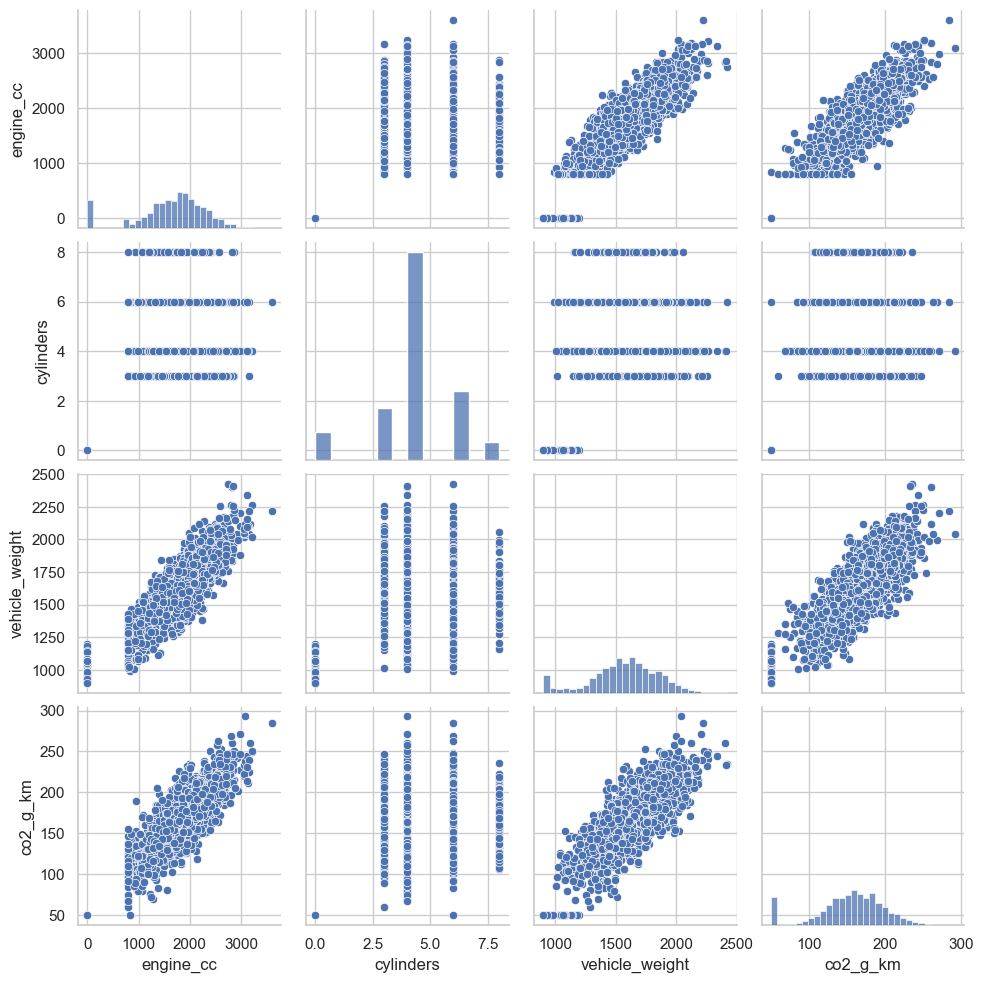

In [4]:
# Visualize relationships between features
plt.figure(figsize=(10, 8))
sns.pairplot(cdf)
plt.show()

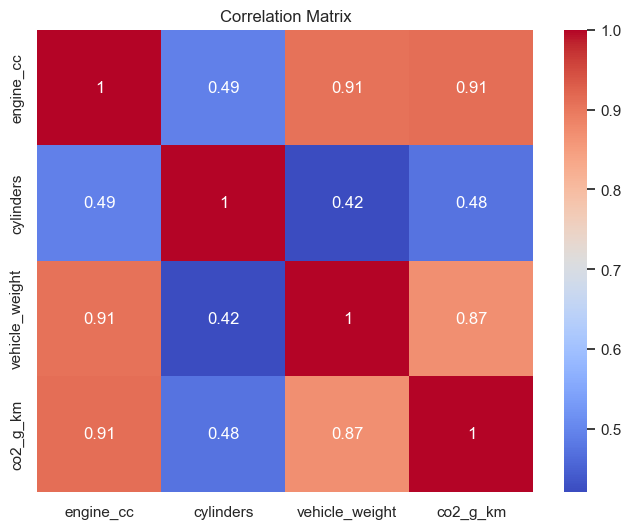

In [5]:
# Visualize correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cdf.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### 3. Data Preprocessing

In [6]:
# Define features (X) and target (y)
X = cdf[['engine_cc', 'cylinders', 'vehicle_weight']]
y = cdf['co2_g_km']

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Training set size: {X_train.shape[0]}')
print(f'Testing set size: {X_test.shape[0]}')

Training set size: 1600
Testing set size: 400


### 4. Model Training

In [7]:
# Initialize and train the model
mlr_model = LinearRegression()
mlr_model.fit(X_train, y_train)

# Model parameters
print(f'Intercept: {mlr_model.intercept_}')
print(f'Coefficients: {mlr_model.coef_}')

Intercept: 16.179567330703463
Coefficients: [0.04489818 1.1095334  0.03812788]


### 5. Prediction and Evaluation

In [8]:
# Make predictions
y_pred = mlr_model.predict(X_test)

# Compare actual vs predicted values
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison_df.head())

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R-squared Score: {r2:.2f}')

# Explained variance score: 1 is perfect prediction
print(f'Variance score: {mlr_model.score(X_test, y_test):.2f}')

          Actual   Predicted
1860  137.517952  150.163005
353   118.216364  127.272668
1333  182.569878  185.993950
905   136.572197  130.547637
1289  123.644423  132.420493
Mean Squared Error (MSE): 296.32
R-squared Score: 0.87
Variance score: 0.87


## Conclusion
The Multiple Linear Regression model successfully predicted CO2 emissions based on engine capacity (cc), cylinders, and vehicle weight. The high R-squared score suggests that these features are robust indicators of CO2 emissions. The correlation matrix also confirmed strong relationships between these vehicle characteristics and CO2 output.